In [2]:
import numpy as np
from math import *
from qiskit import *
from qiskit.tools.visualization import iplot_state_city
import matplotlib.pyplot as plt

In [3]:
#Helper function to find state
def getStateVector(circ):
    result = execute(circ, backend = BasicAer.get_backend('statevector_simulator')).result()
    psi = result.get_statevector(circ)
    return psi

***Exercise 6.5:***

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
a. Prove the following theorem:

    When any one of Alice’s or Bob’s spin operators acts on a
    product state, the result is still a product state.
    
The code below shows that the effect of applying an X-gate to flip the second qubit (Bob) still results in a product state vector with four components. Symbolically, this is:

$\tau _{x} \ket{00} = \ket{01}$

b. Show that in a product state, the expectation value of any component of σ or τ is exactly the same as it would be in the individual single-spin states.

So if we had an individual spin state , $\ket{0}$ , the expectation value of $\tau_{x}$ would be $\bra{0} \tau_{x}\ket{0}$.

$\bra{0} \tau_{x} \ket{0} = \begin{bmatrix}   
                    1&&0 
                    \end{bmatrix} \begin{bmatrix}   
                                    0&&1\\
                                     1&&0
                                    \end{bmatrix} \begin{bmatrix}   
                                                        1 \\
                                                        0 
                                                        \end{bmatrix} = 0$
                                                        
Similarly, for the product state $\ket{00}$, the expecation value of $\tau_{x}$ would be $\bra{00} \tau_{x} \ket{00}$.

$\bra{00} \tau_{x} \ket{ 00} = \begin{bmatrix}   
                    1&&0&&0&&0
                    \end{bmatrix} (I \otimes \tau_{x}) \begin{bmatrix}   
                                                        1 \\
                                                        0 \\
                                                        0 \\
                                                        0 
                                                        \end{bmatrix} = \begin{bmatrix}   
                                                                        1&&0&&0&&0
                                                                        \end{bmatrix} \begin{bmatrix}   
                                                                                        0 \\
                                                                                        1 \\
                                                                                        0 \\
                                                                                        0 
                                                                                        \end{bmatrix} =0$

State Vector: [0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
{'01': 42, '00': 58}


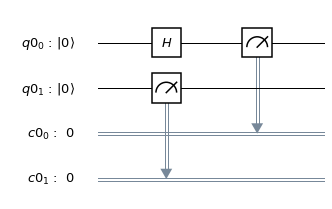

In [4]:
q = QuantumRegister(2)
c = ClassicalRegister(2)

circ = QuantumCircuit(q,c) #the state is |00>
circ.h(0) #flips the second qubit so the state becomes |01>

print('State Vector:' , getStateVector(circ))

meas = QuantumCircuit(q,c)
meas.measure(q,c)

final = circ + meas
shots = 100
job = execute(final, backend = Aer.get_backend('qasm_simulator'), shots = shots)
counts = job.result().get_counts(final)
print(counts)
final.draw(output='mpl')

***Exercise 6.6:***

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Assume Charlie has prepared the two spins in the singlet state. This time, Bob measures $τ_{y}$ and Alice measures $σ_{x}$. What is the expectation value of $σ_{x} τ_{y}$? What does this say about the correlation between the two measurements?

Below we first prepare a singlet state described by:

$\ket{sing} = \frac {1}{\sqrt{2}} (\ket{01} - \ket{10})$

Then, we applied the a Y-gate to the second qubit and then an X-gate to the first qubit, and found the expectation value of $\bra{sing}σ_{x}τ_{y}\ket{sing}$.

$\bra{sing}σ_{x}τ_{y}\ket{sing} = \begin{bmatrix}   
                            0&&\frac{1}{\sqrt{2}}&&-\frac{1}{\sqrt{2}}&&0
                            \end{bmatrix} (σ_{x} \otimes \tau_{y}) \begin{bmatrix}   
                                                                0 \\
                                                                \frac{1}{\sqrt{2}}\\
                                                                -\frac{1}{\sqrt{2}} \\
                                                                0 
                                                                \end{bmatrix} = \begin{bmatrix}   
                                                                                0&&\frac{1}{\sqrt{2}}&&-\frac{1}{\sqrt{2}}&&0
                                                                                    \end{bmatrix} \begin{bmatrix}   
                                                                                                0 \\
                                                                                                -\frac{i}{\sqrt{2}} \\
                                                                                                -\frac{i}{\sqrt{2}} \\
                                                                                                0 
                                                                                                \end{bmatrix} = 0$

In [5]:
#Preparing Singlet State
q = QuantumRegister(2)
c = ClassicalRegister(2)

circS = QuantumCircuit(q,c)
circS.x(1) 
circS.x(0)
circS.h(1)
circS.cx(q[1],q[0])

print('State Vector:' , getStateVector(circS))

#Measuring Singlet State
circ2 = QuantumCircuit(q,c)
circ2.measure(q,c)

singlet = circS + circ2

shots = 100
job = execute(singlet, backend = Aer.get_backend('qasm_simulator'), shots = shots)
counts = job.result().get_counts(singlet)

print('Counts:' , counts)
iplot_state_city(getStateVector(circS))

State Vector: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Counts: {'10': 49, '01': 51}


In [6]:
#Apply the X and Y gates
circ3 = QuantumCircuit(q,c)
circ3.y(0)
circ3.x(1)

tao_y = circS + circ3

#Measure
circ4 = QuantumCircuit(q,c)
circ4.measure(q,c)

tao_y_meas = circS + circ3 + circ4

shots = 20
job = execute(tao_y_meas, backend = Aer.get_backend('qasm_simulator'), shots = shots)
counts = job.result().get_counts(tao_y_meas)
print('Counts:' , counts)

print('State Vector After tao_y and sigma_x:' , getStateVector(tao_y))
print('Singlet State:' , getStateVector(circS))

print('Expectation Value, <sigma_x.tao_y>:' , np.transpose(getStateVector(circS))@getStateVector(tao_y))


Counts: {'10': 9, '01': 11}
State Vector After tao_y and sigma_x: [0.+0.j         0.-0.70710678j 0.-0.70710678j 0.+0.j        ]
Singlet State: [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]
Expectation Value, <sigma_x.tao_y>: 0j
